# selective search를 이용해 Objective Detection을 위한 Region Proposal 영역을 도출

## selective search를 설치하고 이미지 불러오기

In [ ]:
# 라이브러리 설치
!pip install selectivesearch

# 라이브러리 불러오기
import selectivesearch

In [ ]:
# 이미지 데이터 다운
!mkdir /content/data
!wget -O /content/data/audrey01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/audrey01.jpg

--2022-04-16 02:46:21--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/audrey01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30102 (29K) [image/jpeg]
Saving to: ‘/content/data/audrey01.jpg’

/content/data/audre 100%[===================>]  29.40K  --.-KB/s    in 0.002s  

2022-04-16 02:46:21 (12.6 MB/s) - ‘/content/data/audrey01.jpg’ saved [30102/30102]



img shape: (450, 375, 3)


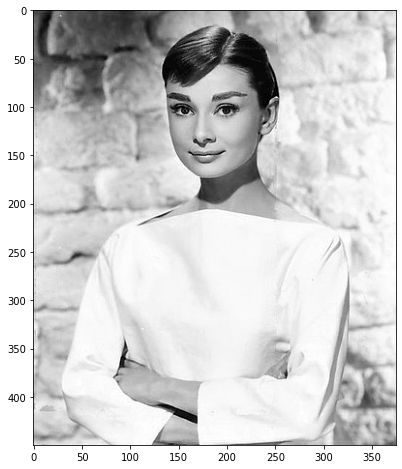

In [ ]:
# 이미지 보기
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

# 오드리헵번 이미지를 cv2로 로드하고 matplotlib으로 시각화 
img = cv2.imread('./data/audrey01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

In [ ]:
# selectivesearch.selective_search()는 이미지의 Region Proposal 정보를 반환
# 매개변수
## 대상이 있을만한 이미지 설정
## scale : 찾을 오브젝트의 스케일 설정, 이 스케일 위주로 찾음
## min_size : 최소 사이즈
# regions : 오브젝트가 있을만한 공간
_, regions = selectivesearch.selective_search(img_rgb, scale = 100, min_size = 2000)

print(type(regions), len(regions))

<class 'list'> 41


## 반환된 Region Proposal(후보 영역)에 대한 정보 보기
- 반환된 regions 변수는 리스트 타입으로 세부 원소로 딕셔너리를 가지고 있음
- 개별 딕셔너리 내의 KEY값별 의미
  - rect : x, y 시작 좌표와 너비, 높이 값을 가지며 이 값이 Detected Object 후보를 나타내는 Bounding box임
  - size : segment로 select된 Object의 크기
  - labels : 해당 rect로 지정된 Bounding Box내에 있는 오브젝트들의 고유 ID
  - 아래로 내려갈 수록 너비와 높이 값이 큰 Bounding box이며 하나의 Bounding box에 여러개의 오브젝트가 있을 확률이 커짐

In [ ]:
print(regions)
# labels가 2개 이상이 나오는 이유 : 비슷한 레이블이라서 합쳐야 함
# rect : 오브젝트를 발견한 바운딩 박스 좌표
# size : rect의 사이즈(크기)
# 만약 위의 매개변수인 size의 숫자를 크게 잡으면
# 그 이상의 사이즈인 rect만 추출하기 때문에 regions의 수는 작아짐

[{'rect': (0, 0, 107, 167), 'size': 11166, 'labels': [0.0]}, {'rect': (15, 0, 129, 110), 'size': 8771, 'labels': [1.0]}, {'rect': (121, 0, 253, 133), 'size': 17442, 'labels': [2.0]}, {'rect': (134, 17, 73, 62), 'size': 2713, 'labels': [3.0]}, {'rect': (166, 23, 87, 176), 'size': 8639, 'labels': [4.0]}, {'rect': (136, 53, 88, 121), 'size': 4617, 'labels': [5.0]}, {'rect': (232, 79, 117, 147), 'size': 7701, 'labels': [6.0]}, {'rect': (50, 91, 133, 123), 'size': 7042, 'labels': [7.0]}, {'rect': (305, 97, 69, 283), 'size': 11373, 'labels': [8.0]}, {'rect': (0, 161, 70, 46), 'size': 2363, 'labels': [9.0]}, {'rect': (72, 171, 252, 222), 'size': 34467, 'labels': [10.0]}, {'rect': (0, 181, 118, 85), 'size': 5270, 'labels': [11.0]}, {'rect': (106, 210, 89, 101), 'size': 2868, 'labels': [12.0]}, {'rect': (302, 228, 66, 96), 'size': 2531, 'labels': [13.0]}, {'rect': (0, 253, 92, 134), 'size': 7207, 'labels': [14.0]}, {'rect': (153, 270, 173, 179), 'size': 10360, 'labels': [15.0]}, {'rect': (0, 30

In [ ]:
# regions에서 rect 좌표 정보만 추출하기
cand_rects = [cand['rect'] for cand in regions]
print(cand_rects)

[(0, 0, 107, 167), (15, 0, 129, 110), (121, 0, 253, 133), (134, 17, 73, 62), (166, 23, 87, 176), (136, 53, 88, 121), (232, 79, 117, 147), (50, 91, 133, 123), (305, 97, 69, 283), (0, 161, 70, 46), (72, 171, 252, 222), (0, 181, 118, 85), (106, 210, 89, 101), (302, 228, 66, 96), (0, 253, 92, 134), (153, 270, 173, 179), (0, 305, 47, 139), (104, 312, 80, 71), (84, 360, 91, 67), (0, 362, 171, 87), (297, 364, 77, 85), (0, 91, 183, 175), (136, 23, 117, 176), (72, 171, 254, 278), (134, 17, 119, 182), (302, 97, 72, 283), (121, 0, 253, 226), (0, 91, 183, 175), (0, 0, 144, 167), (0, 0, 253, 199), (0, 253, 92, 191), (0, 91, 183, 353), (0, 171, 326, 278), (0, 97, 374, 352), (84, 312, 100, 115), (0, 91, 184, 353), (0, 91, 195, 353), (0, 0, 374, 444), (0, 0, 374, 449), (0, 0, 374, 449), (0, 0, 374, 449)]


## bounding box 시각화하기

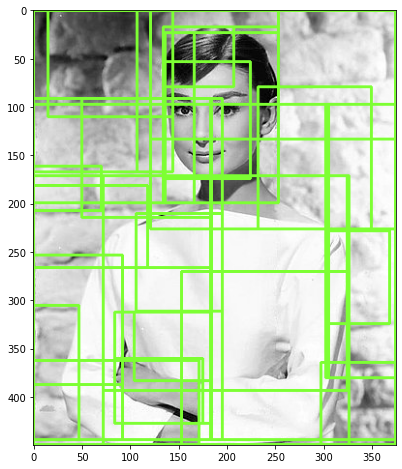

In [ ]:
# opencv의 rectangle()을 이용하여 시각화
# 매개변수로 이미지와 좌상단 좌표, 우하단 좌표, box 색, 두께 등을 입력하면 원본 이미지에 box를 그려줌

green_rgb = (125, 255, 51)
img_rgb_copy = img_rgb.copy()
for rect in cand_rects:
    
    left = rect[0]
    top = rect[1]
    # rect[2], rect[3]은 너비와 높이이므로 우하단 좌표를 구하기 위해 좌상단 좌표에 각각을 더함
    right = left + rect[2]
    bottom = top + rect[3]
    
    img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color=green_rgb, thickness=2)
    
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb_copy)
plt.show()

## bounding box의 크기가 10000 초과인 것만 보기

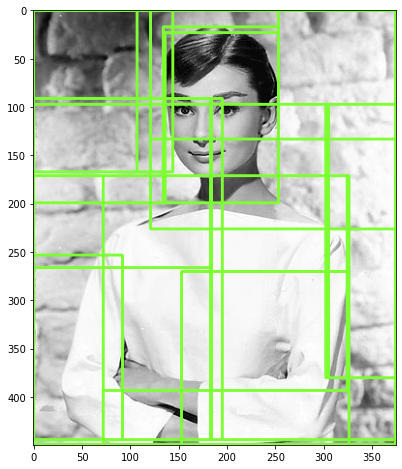

In [ ]:
# 그냥 조건문 넣어서 필터링
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 10000]

green_rgb = (125, 255, 51)
img_rgb_copy = img_rgb.copy()
for rect in cand_rects:
    
    left = rect[0]
    top = rect[1]
    right = left + rect[2]
    bottom = top + rect[3]
    
    img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color=green_rgb, thickness=2)
    
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb_copy)
plt.show()

## 매개변수로 후보 박스와 실제 박스를 받아서 IoU를 계산하는 함수 만들기

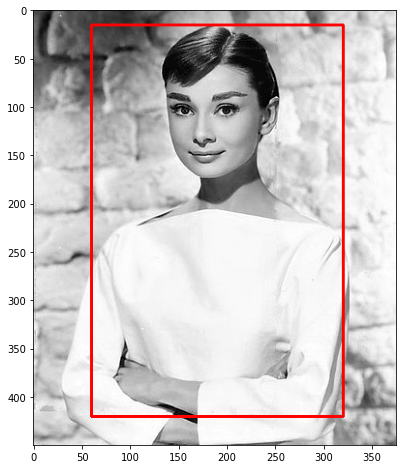

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# 테스트용 좌표(실측된 바운딩 박스)
gt_box = [60, 15, 320, 420]


img = cv2.imread('./data/audrey01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

red = (255, 0 , 0)
img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color = red, thickness = 2)

plt.figure(figsize = (8, 8))
plt.imshow(img_rgb)
plt.show()

In [ ]:
# cand_box : 예측된 바운딩 박스
# gt_box : 실측된 바운딩 박스
def compute_iou(cand_box, gt_box):
    import numpy as np 
    # 예측된 바운딩 박스와 실측된 바운딩 박스의 중첩되는 공간 계산
    # (x1, y1) = 중첩된 공간의 좌상단 좌표 : 예측, 실측 바운딩 박스의 좌상단 좌표 중 큰 값
    # (x2, y2) = 중첩된 공간의 우하단 좌표 : 예측, 실측 바운딩 박스의 우하단 좌표 중 작은 값
    x1 = np.maximum(cand_box[0], gt_box[0])
    y1 = np.maximum(cand_box[1], gt_box[1])
    x2 = np.minimum(cand_box[2], gt_box[2])
    y2 = np.minimum(cand_box[3], gt_box[3])
    
    # 위에서 만든 좌상단, 우하단 좌표로 w(우상단)와 h(좌하단)를 계산하고
    # 이 둘을 곱해서 중첩된 공간의 넓이를 구함
    intersection = np.maximum(x2 - x1, 0) * np.maximum(y2 - y1, 0)
    
    # 예측된 바운딩 박스의 넓이 계산
    cand_box_area = (cand_box[2] - cand_box[0]) * (cand_box[3] - cand_box[1])
    # 실측된 바운딩 박스의 넓이 계산
    gt_box_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
    # 두 바운딩 박스의 넓이를 더해서 중첩된 공간의 넓이를 빼기
    union = cand_box_area + gt_box_area - intersection
    
    # iou 구하기
    iou = intersection / union

    # iou 리턴
    return iou

In [ ]:
# iou 계산 함수 적용
cand_rects = [cand['rect'] for cand in regions]
for index, cand_box in enumerate(cand_rects):
    cand_box = list(cand_box)
    cand_box[2] += cand_box[0]
    cand_box[3] += cand_box[1]
    
    iou = compute_iou(cand_box, gt_box)
    print('index:', index, "iou:", iou)

index: 0 iou: 0.06157293686705451
index: 1 iou: 0.07156308851224105
index: 2 iou: 0.2033654637255666
index: 3 iou: 0.04298195631528965
index: 4 iou: 0.14541310541310543
index: 5 iou: 0.10112060778727446
index: 6 iou: 0.11806905615946989
index: 7 iou: 0.1420163334272036
index: 8 iou: 0.035204259342190375
index: 9 iou: 0.004256894317971497
index: 10 iou: 0.5184766640298338
index: 11 iou: 0.04465579710144928
index: 12 iou: 0.0853656220322887
index: 13 iou: 0.015722240419259743
index: 14 iou: 0.037833068643021
index: 15 iou: 0.22523535071077264
index: 16 iou: 0.0
index: 17 iou: 0.053941120607787274
index: 18 iou: 0.05154006626579948
index: 19 iou: 0.05660327592118798
index: 20 iou: 0.01165009904393209
index: 21 iou: 0.18588082901554404
index: 22 iou: 0.19555555555555557
index: 23 iou: 0.5409250175192712
index: 24 iou: 0.205679012345679
index: 25 iou: 0.042245111210628454
index: 26 iou: 0.34848824374009246
index: 27 iou: 0.18588082901554404
index: 28 iou: 0.10952135872362326
index: 29 iou: 

img shape: (450, 375, 3)
index: 3 iou: 0.6341234282410753 rectangle: (0, 0, 374, 444)
index: 4 iou: 0.6270619201314865 rectangle: (0, 0, 374, 449)
index: 5 iou: 0.6270619201314865 rectangle: (0, 0, 374, 449)
index: 6 iou: 0.6270619201314865 rectangle: (0, 0, 374, 449)
index: 12 iou: 0.5490037131949166 rectangle: (0, 97, 374, 449)
index: 20 iou: 0.5184766640298338 rectangle: (72, 171, 324, 393)
index: 21 iou: 0.5409250175192712 rectangle: (72, 171, 326, 449)


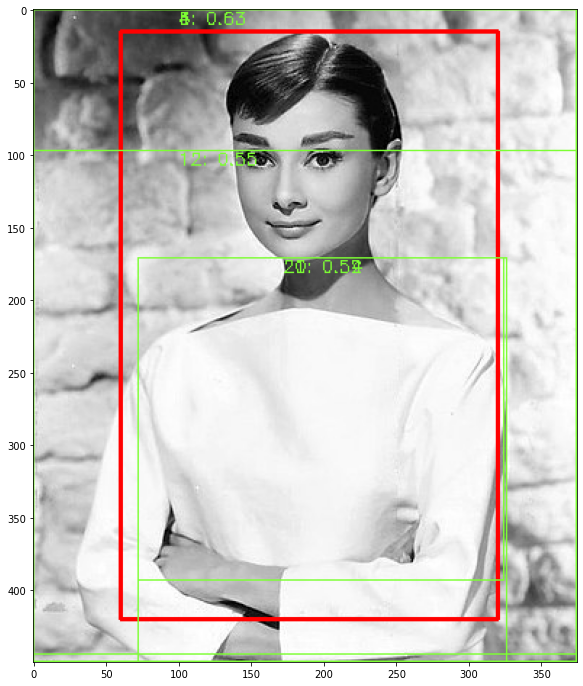

In [ ]:
img = cv2.imread('./data/audrey01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

green_rgb = (125, 255, 51)
gt_box = [60, 15, 320, 420]
# 실측 바운딩박스 그리기
img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color = red, thickness = 2)

# 사이즈가 5000 초과만 필터링
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 5000]
cand_rects.sort()

for index, cand_box in enumerate(cand_rects):
    cand_box = list(cand_box)
    cand_box[2] += cand_box[0]
    cand_box[3] += cand_box[1]
    # iou 계산
    iou = compute_iou(cand_box, gt_box)
    # iou가 0.5보다 크면 초록색으로 예측된 바운딩 박스 그리기
    if iou > 0.5:
      print('index:', index, "iou:", iou, 'rectangle:',(cand_box[0], cand_box[1], cand_box[2], cand_box[3]) )
      cv2.rectangle(img_rgb, (cand_box[0], cand_box[1]), (cand_box[2], cand_box[3]), color = green_rgb, thickness = 1)
      text = "{}: {:.2f}".format(index, iou)
      cv2.putText(img_rgb, text, (cand_box[0]+ 100, cand_box[1]+10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color = green_rgb, thickness = 1)
    
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)
plt.show()